In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('recruitment_data.csv')
df = pd.DataFrame(data)

In [7]:
df.head(10)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
5,27,0,3,14,4,31.706659,54,50,50,1,1
6,48,0,2,6,1,17.291229,24,52,64,3,0
7,40,0,4,13,3,10.586811,6,3,92,3,0
8,26,1,3,6,5,28.774864,80,78,51,1,1
9,45,1,2,2,5,30.195964,92,16,94,3,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [24]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


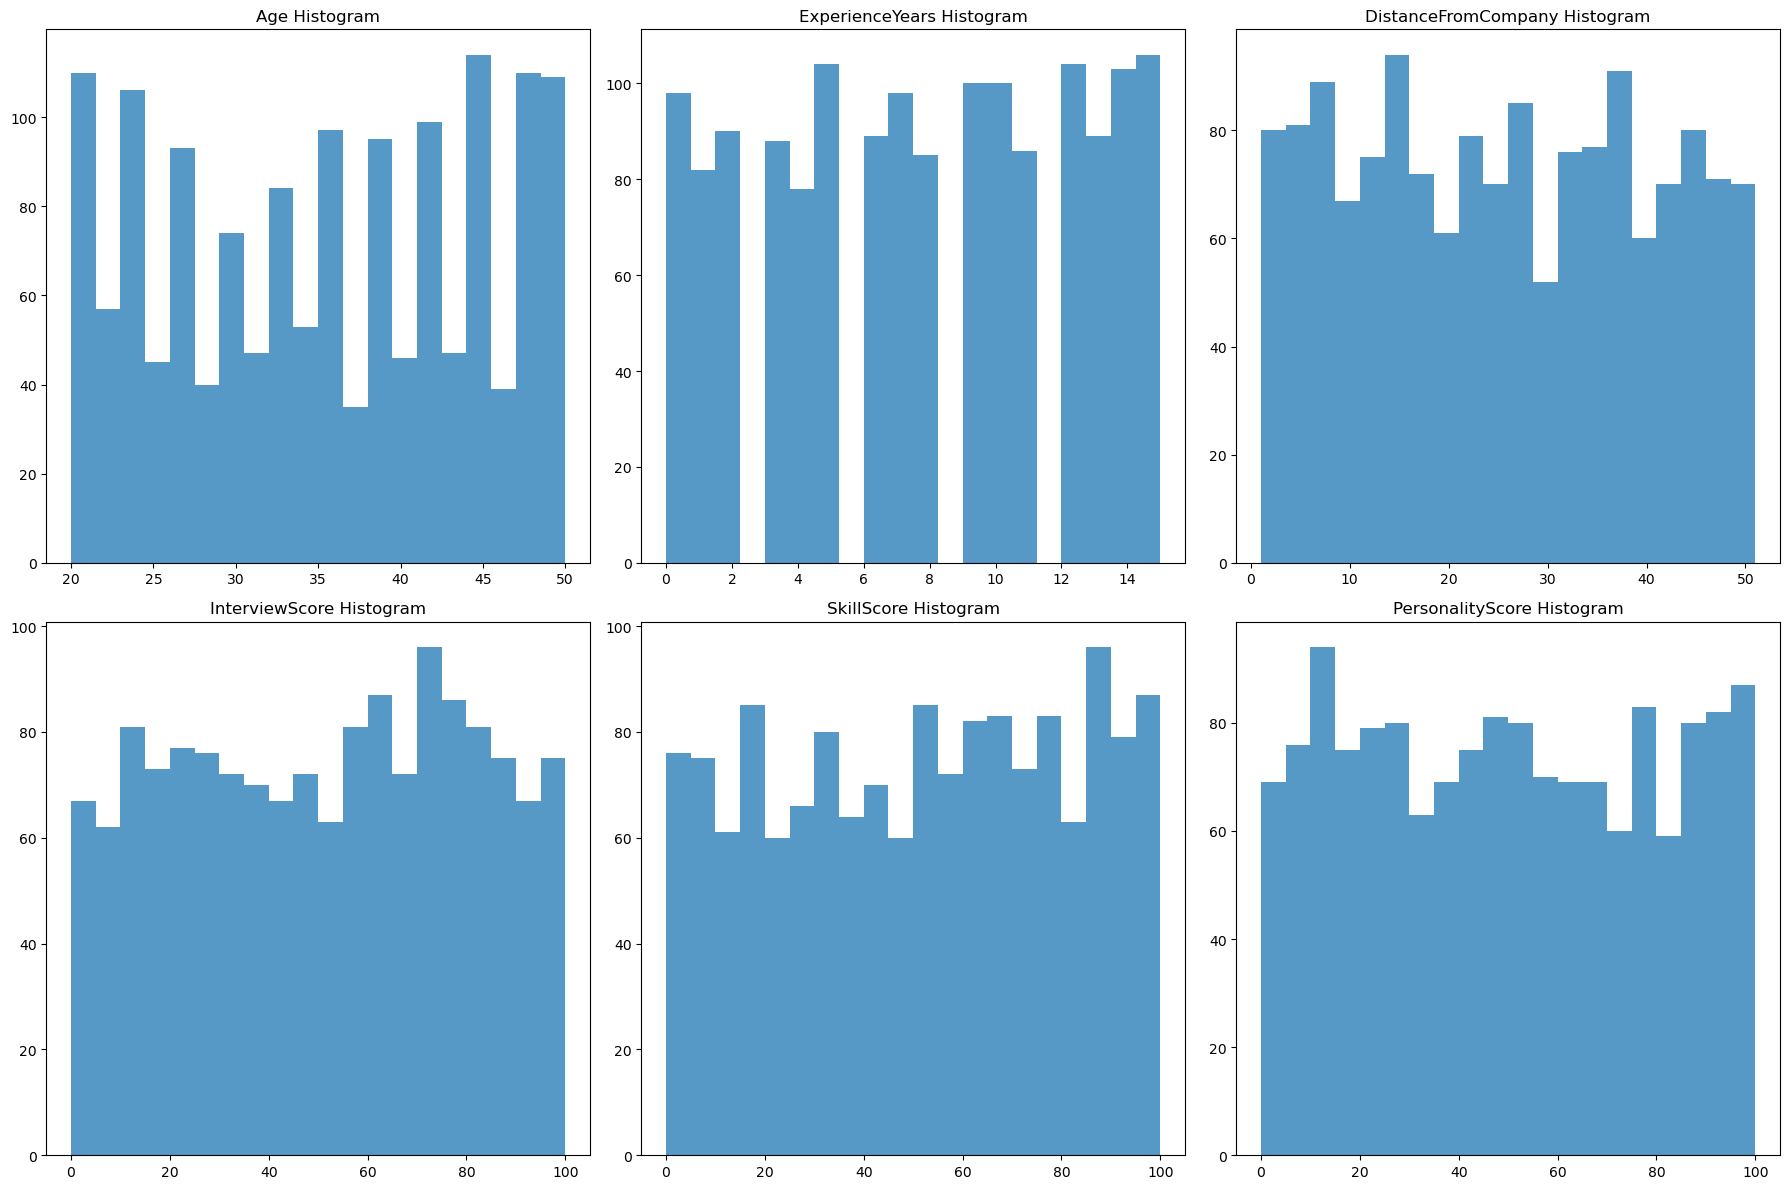

In [39]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# List of columns to plot
columns = ['Age', 'ExperienceYears', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']

# Plot histograms in each subplot
for ax, column in zip(axs.flat, columns):
    ax.hist(df[column], bins=20, alpha=0.75)
    ax.set_title(f'{column} Histogram')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

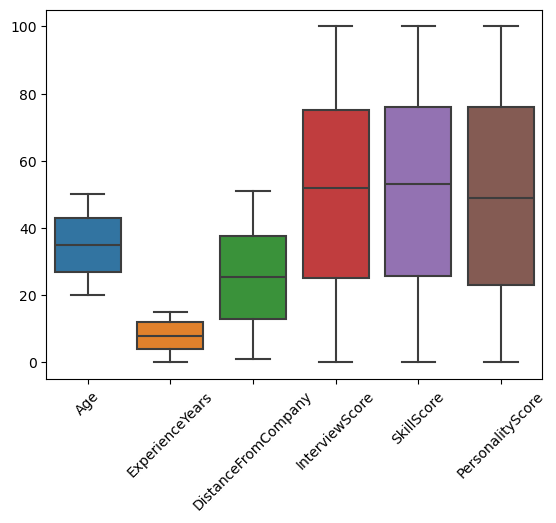

In [46]:
columns = ['Age', 'ExperienceYears', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']

sns.boxplot(data=df[columns],showfliers=True)
plt.xticks(rotation=45)
plt.show()

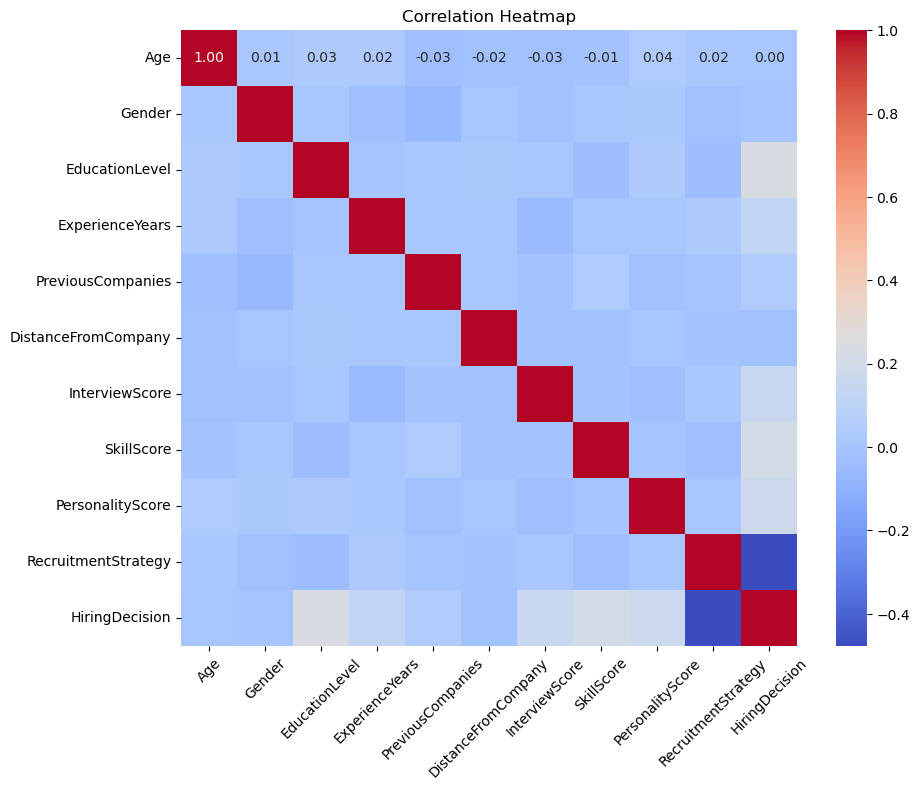

In [48]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

c:\Users\Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

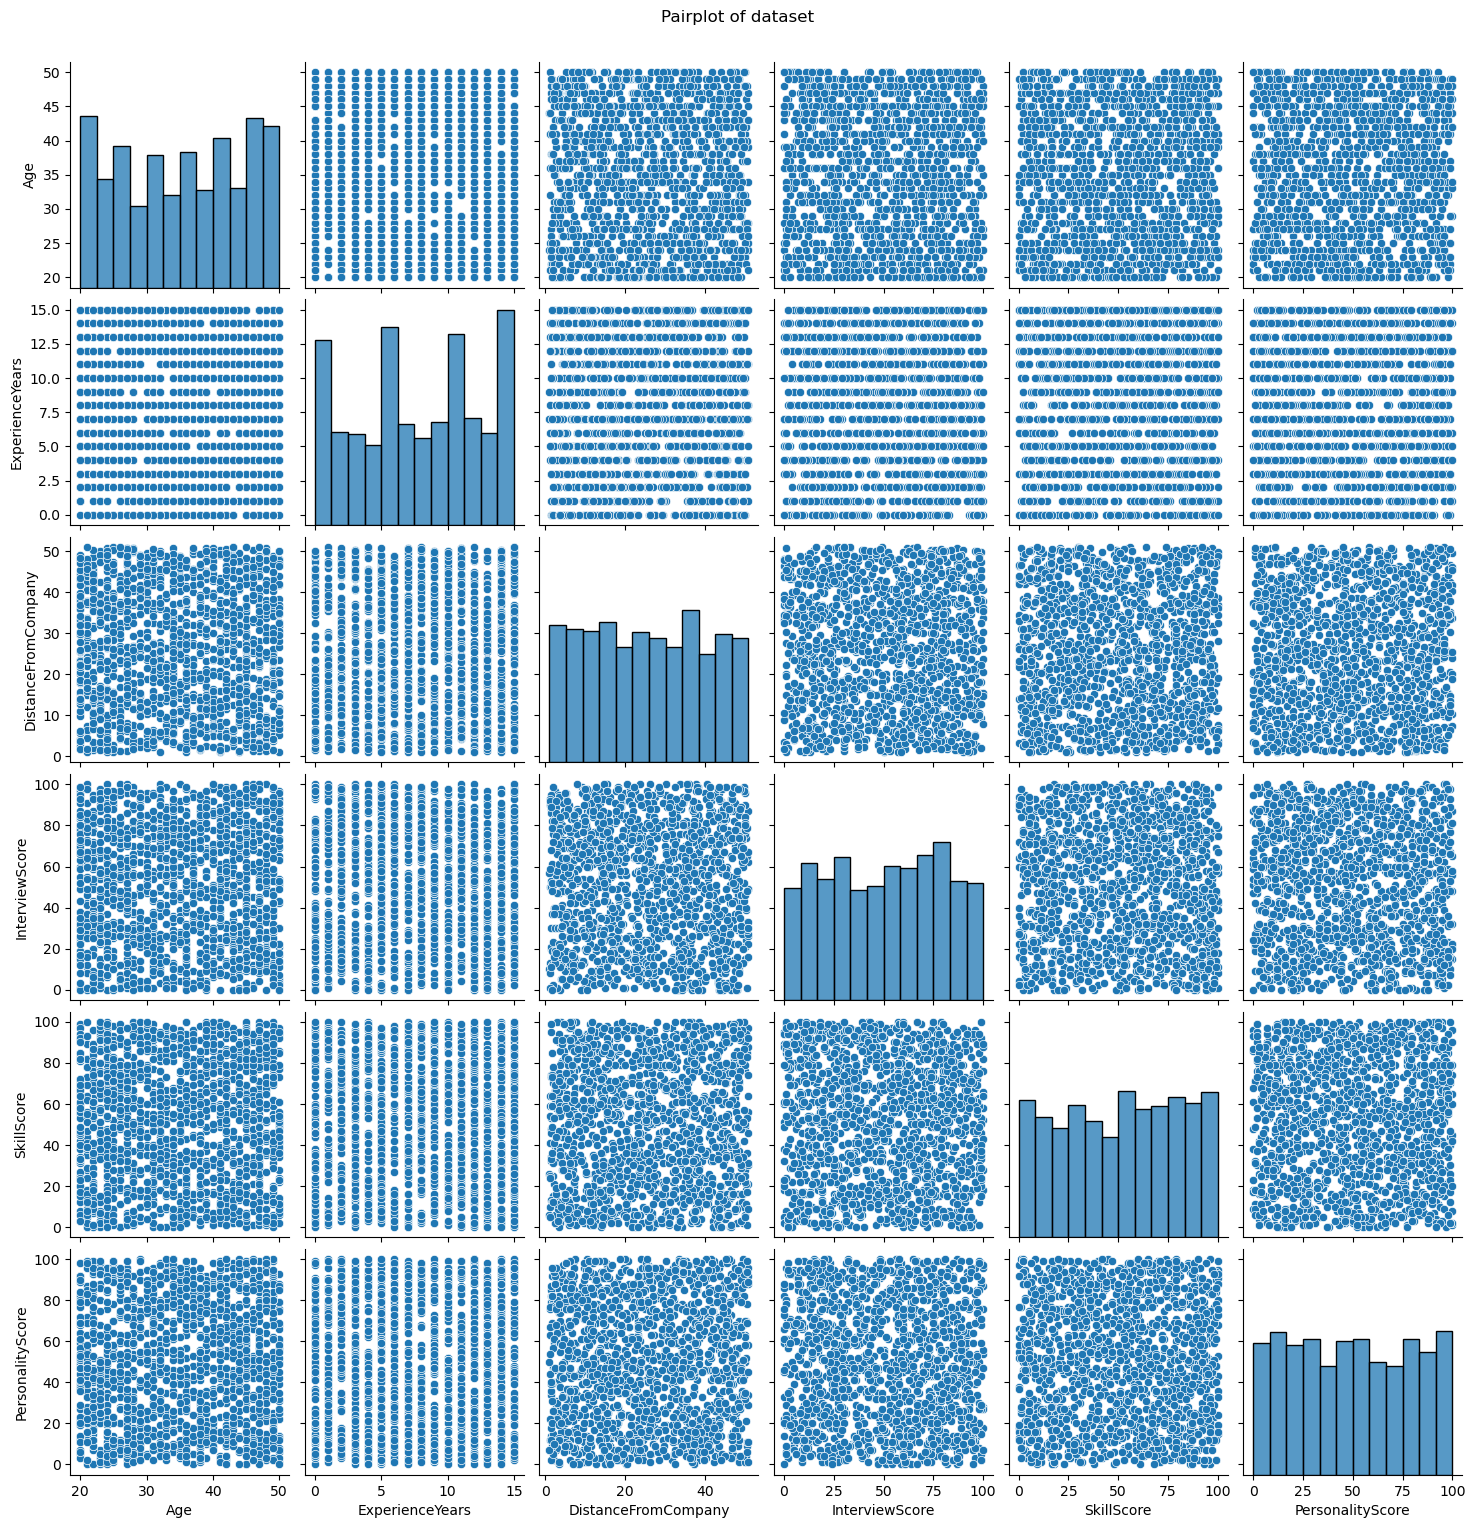

In [50]:
sns.pairplot(df[columns])
plt.suptitle('Pairplot of dataset', y=1.02)
plt.show()

In [52]:
df_encoded = pd.get_dummies(df,columns=['Gender','RecruitmentStrategy'], drop_first=True)

df_encoded.head()

,Age,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision,Gender_1,RecruitmentStrategy_2,RecruitmentStrategy_3
0,26,2,0,3,26.783828,48,78,91,1,True,False,False
1,39,4,12,3,25.862694,35,68,80,1,True,True,False
2,48,2,3,2,9.920805,20,67,13,0,False,True,False
3,34,2,5,2,6.407751,36,27,70,0,True,False,True
4,30,1,6,1,43.105343,23,52,85,0,False,True,False


In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

continuous_features = ['Age', 'ExperienceYears', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standardized = df.copy()
df_standardized[continuous_features] = scaler_standard.fit_transform(df_standardized[continuous_features])

df_normalized = df.copy()
df_normalized[continuous_features] = scaler_minmax.fit_transform(df[continuous_features])

print("Standardized DataFrame:")
print(df_standardized.head())

print("\nNormalized DataFrame:")
print(df_normalized.head())

Standardized DataFrame:
        Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0 -0.989083       1               2        -1.658237                  3   
1  0.416376       1               4         0.928044                  3   
2  1.389387       0               2        -1.011667                  2   
3 -0.124185       1               2        -0.580620                  2   
4 -0.556634       0               1        -0.365097                  1   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0             0.087792       -0.089598    0.916174          1.418126   
1             0.024537       -0.543879    0.575386          1.043255   
2            -1.070200       -1.068049    0.541307         -1.240051   
3            -1.311444       -0.508934   -0.821844          0.702463   
4             1.208598       -0.963215    0.030126          1.213651   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1         

In [72]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['HiringDecision'])
y = df['HiringDecision']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('Training set shape:', x_train.shape, y_train.shape)
print('Testing set shape:', x_test.shape, y_test.shape)

Training set shape: (1200, 12) (1200,)
Testing set shape: (300, 12) (300,)


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1500, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Logistic Regression: {accuracy:.2f}')

# Optional: Print classification report for more detailed evaluation
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       215
           1       0.82      0.79      0.80        85

    accuracy                           0.89       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.89      0.89      0.89       300



In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

cv_scores = cross_val_score(model, x, y, cv=5, scoring=make_scorer(accuracy_score))

print("Cross-validation Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

Cross-validation Scores: [0.91       0.88       0.89666667 0.87333333 0.74666667]
Mean Accuracy: 0.86 (+/- 0.12)


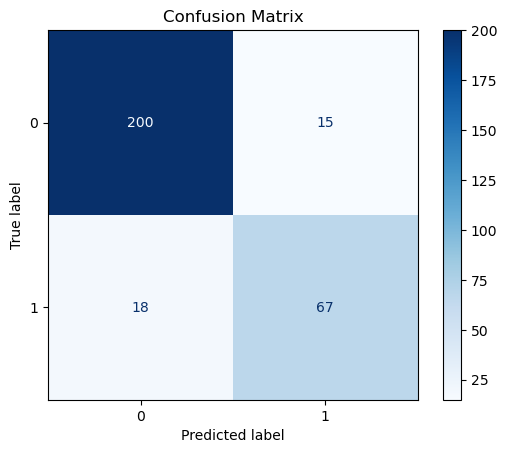

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [76]:
!pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -- ------------------------------------ 30.7/456.1 kB 435.7 kB/s eta 0:00:01
   --- ----------------------------------- 41.0/456.1 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.1 kB 393.8 kB/s eta 0:00:02
   ------- ------------------------------- 81.9/456.1 kB 163.7 kB/s eta 0:00:03
   ------- ------------------------------- 92.2/456.1 kB 169.3 kB/s eta 0:00:03
   --------- ---------------------------- 112.6/4

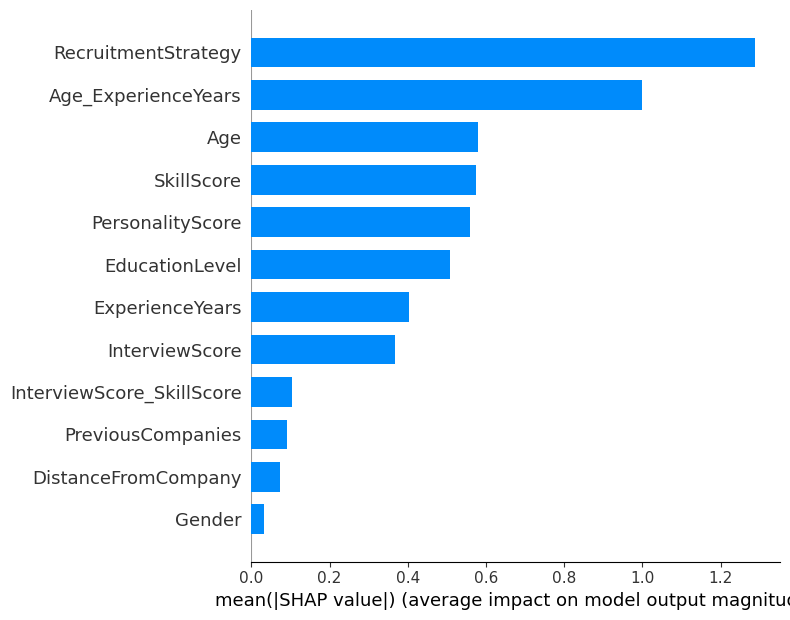

In [77]:
import shap

explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test, plot_type='bar')